In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
X = np.linspace(0,10,20)

In [5]:
print(X)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


In [6]:
Y = (X-5)**2 + 3

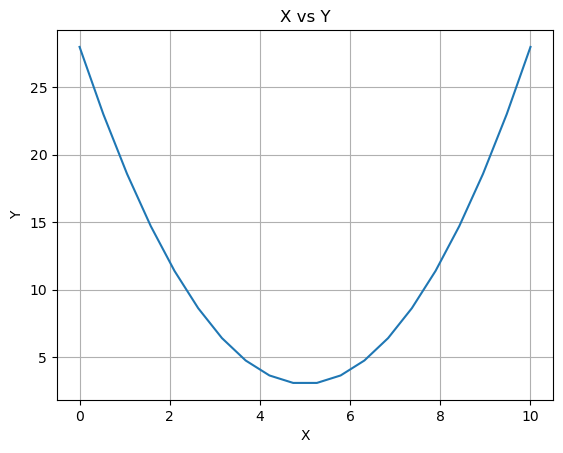

In [7]:
plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.title('X vs Y')
plt.show()

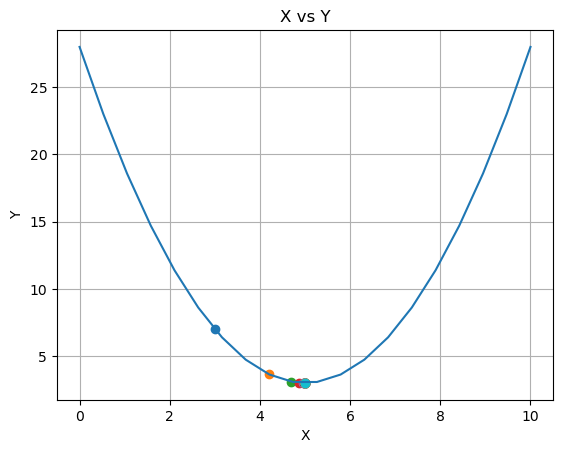

In [8]:
# Gradient Descent
# initialize x
x = 0
lr = 0.3
plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.title('X vs Y')
for i in range(50):
  grad = 2*(x-5)
  x = x - lr * grad
  y = (x-5)**2 + 3
  plt.scatter(x,y)

plt.show()

In [9]:
# 01 - Data Generation

def generateData(m):
  X = np.random.randn(m)*10
  noise = np.random.randn(m)

  y = 3*X+1 + 5*noise
  return X,y

In [10]:
X,y = generateData(100)
print(X.shape,y.shape)

(100,) (100,)


In [11]:
def plotData(X,y,color = "orange" , title = 'Data'):
  plt.scatter(X,y,color = color)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.grid()
  plt.title(title)
  plt.show()

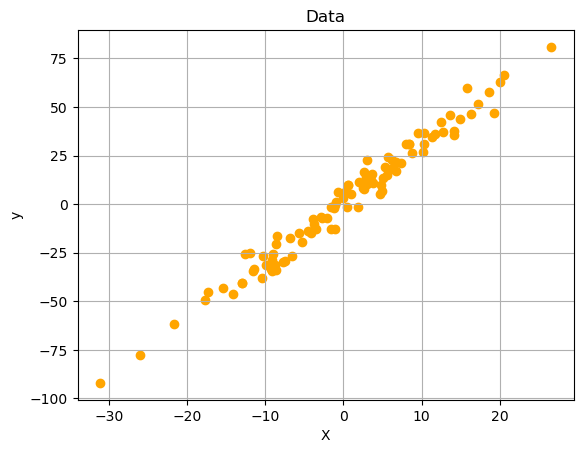

In [12]:
plotData(X,y)

In [13]:
# 02 - Data Normalisation since scale could be different for each feature
def normaliseData(X):

  X_ = (X - X.mean())/X.std()
  return X_

In [29]:
X = normaliseData(X)

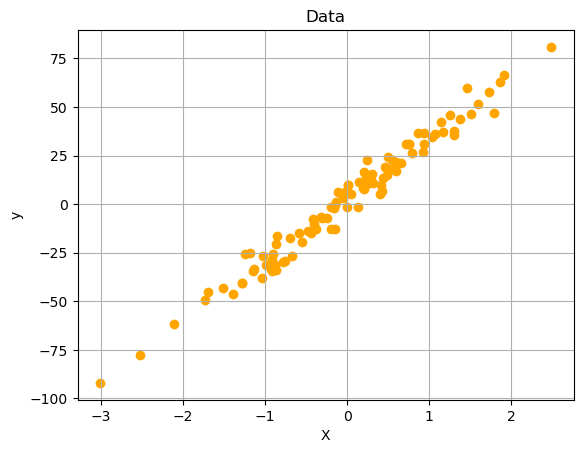

In [30]:
plotData(X,y)

In [31]:
X.mean()

-3.8857805861880476e-17

In [32]:
X.std()

1.0

In [33]:
# Train - Test Split

def trainTestSplit(X,y,split = 0.8):
    m = X.shape[0]
    data = np.zeros((m,2))

    data[:,0] = X
    data[:,1] = y

    np.random.shuffle(data)
    split = int(m*split)

    XT = data[:split,0]
    yT = data[:split,1]

    Xt = data[split:,0]
    yt = data[split:,1]

    return XT,yT,Xt,yt

In [39]:
XT,yT,Xt,yt = trainTestSplit(X,y)

In [40]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


In [36]:
# Hypothesis

def hypothesis(X,theta):
    return theta[0] + theta[1]*X


def error(X,y,theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i],theta)
        e+=(y[i]-y_i)**2

    e = e/(2*m)
    return e


def gradient(X,y,theta):
    grad = np.zeros((2,))

    m = X.shape[0]

    for i in range(m):
        grad[0]+=(hypothesis(X[i],theta)-y[i])
        grad[1]+=(hypothesis(X[i],theta)-y[i])*X[i]

    grad = grad/m

    return grad
        
        
def train(X,y,lr = 0.1):
    theta = np.zeros((2,))

    maxItrs = 100
    error_list = []
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - lr * grad[0]
        theta[1] = theta[1] - lr * grad[1]
    plt.plot(error_list,label='Error')
    plt.xlabel('Iteration Number')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    return theta

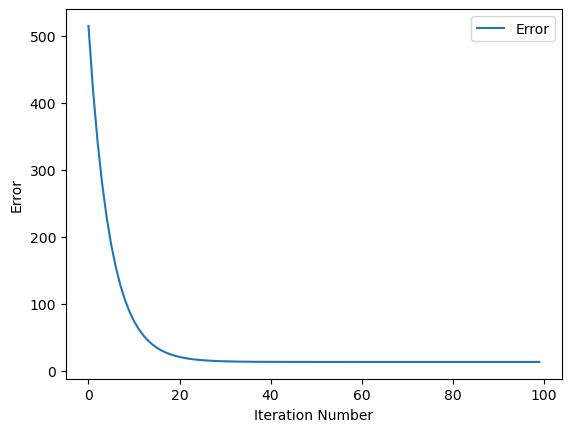

In [37]:
theta = train(X,y)

In [38]:
theta

array([ 2.34489123, 31.58239776])

In [43]:
def predict(X,theta):
    return hypothesis(X,theta)

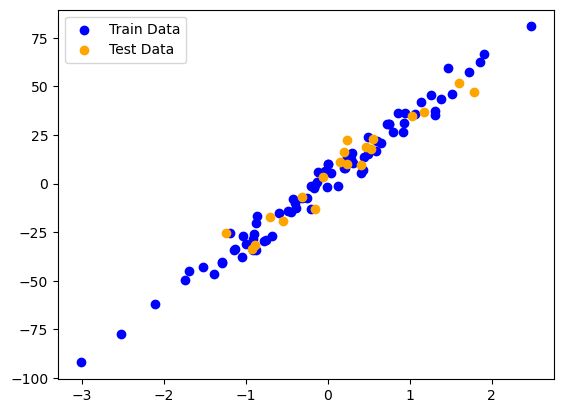

In [44]:
plt.scatter(XT,yT,color = 'blue' , label = 'Train Data')
plt.scatter(Xt,yt,color='orange',label='Test Data')
plt.legend()
plt.show()

In [45]:
yp = predict(Xt,theta)

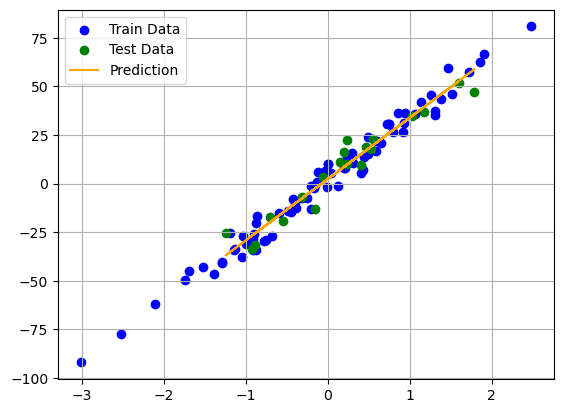

In [48]:
plt.scatter(XT,yT,color = 'blue' , label = 'Train Data')
plt.scatter(Xt,yt,color = 'green' , label = 'Test Data')
plt.plot(Xt,yp,color='orange',label = 'Prediction')
plt.grid()
plt.legend()
plt.show()

In [49]:
## R2 Square Metric
y_mean = np.mean(y)


In [52]:
def r2Score(y,yp):
    ymean = y.mean()

    num = np.sum((y-yp)**2)
    den = np.sum((y-ymean)**2)

    return(1-(num/den))

In [54]:
print(r2Score(yt,yp))

0.935785767681862


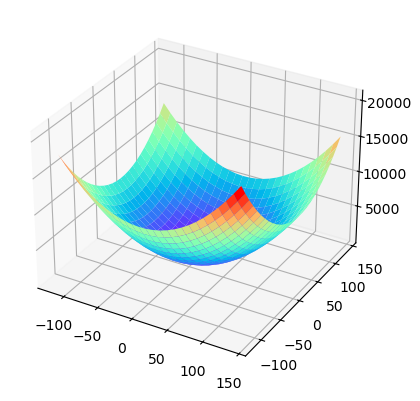

In [59]:
# Visualising the training process
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]

        J[i,j] = np.mean((y-yp)**2)/2

fig = plt.figure()
axes = plt.axes(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()


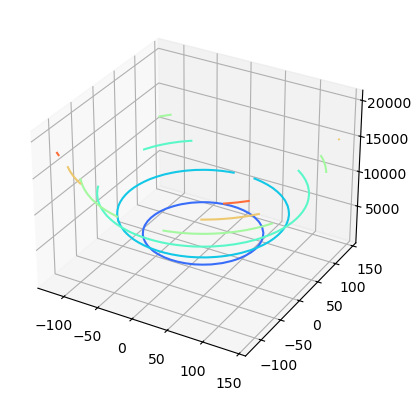

In [60]:
# Visualising the training process
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]

        J[i,j] = np.mean((y-yp)**2)/2

fig = plt.figure()
axes = plt.axes(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()



In [ ]:
# Trace the trajectory of gradient
def train(X,y,lr = 0.1):
    theta = np.zeros((2,))

    maxItrs = 100
    error_list = []
    theta_list = []
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - lr * grad[0]
        theta[1] = theta[1] - lr * grad[1]
    plt.plot(error_list,label='Error')
    plt.xlabel('Iteration Number')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    return theta